In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
# Ratings data
ratings = pd.read_csv("../data/raw/ratings.csv")
ratings = ratings.loc[:,["userId","movieId","rating"]]
# Movie data
movies = pd.read_csv("../data/raw/movies.csv")
movies = movies.loc[:,["movieId","title"]]
# Merge
data = pd.merge(movies,ratings)
data.head(5)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [3]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(data['title'])
data['title'] = enc.transform(data['title'])

In [4]:
from sklearn.cluster import KMeans
# k-means clustering
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

cluster_labels, cent = doKmeans(data, 3)
kmeans = pd.DataFrame(cluster_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

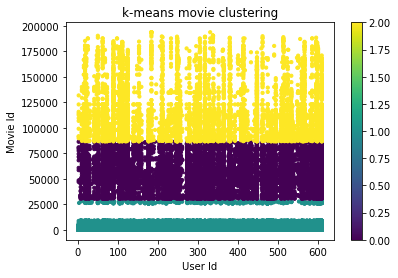

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('k-means movie clustering')
ax.set_xlabel('User Id')
ax.set_ylabel('Movie Id')
scatter = ax.scatter(data['userId'],data['movieId'],
                     c=kmeans[0],s=10)

print(plt.colorbar(scatter))

ValueError: c of shape (100836,) not acceptable as a color sequence for x with size 100, y with size 100

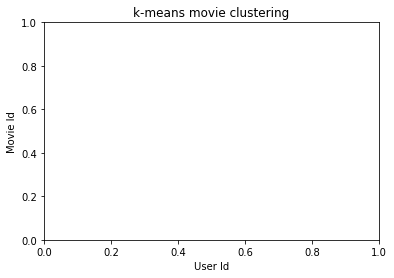